In [2]:
import tensorflow as tf
print("Version of tensorflow is := ",tf.__version__)

Version of tensorflow is :=  2.1.0


In [7]:
(train_data,train_label),(test_data , test_label) = tf.keras.datasets.mnist.load_data()

In [8]:
print("Shape of Training data :\n=============================")
print("Shape of train_data := ",train_data.shape)
print("Shape of train_label := ",train_label.shape)
print("\nShape of Testing data :\n=============================")
print("Shape of test_data := ",test_data.shape)
print("Shape of test_label := ",test_label.shape)

Shape of Training data :
Shape of train_data :=  (60000, 28, 28)
Shape of train_label :=  (60000,)

Shape of Testing data :
Shape of test_data :=  (10000, 28, 28)
Shape of test_label :=  (10000,)


In [9]:
train_data = train_data / 255.0
test_data   = test_data  / 255.0

In [10]:
print("Train_label := ",train_label[:5])
print("Test_label := ",test_label[:5])

Train_label :=  [5 0 4 1 9]
Test_label :=  [7 2 1 0 4]


In [11]:
train_label = tf.keras.utils.to_categorical(train_label)
test_label  = tf.keras.utils.to_categorical(test_label)

In [14]:
print("Train_label := ",train_label[:2])
print("\n========================================\n")
print("Test_label := ",test_label[:2])

Train_label :=  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Test_label :=  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
print("Shape of Training data :\n=============================")
print("Shape of train_data := ",train_data.shape)
print("Shape of train_label := ",train_label.shape)
print("\nShape of Testing data :\n=============================")
print("Shape of test_data := ",test_data.shape)
print("Shape of test_label := ",test_label.shape)

Shape of Training data :
Shape of train_data :=  (60000, 28, 28)
Shape of train_label :=  (60000, 10)

Shape of Testing data :
Shape of test_data :=  (10000, 28, 28)
Shape of test_label :=  (10000, 10)


In [22]:
network = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28 , 28)),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
network.compile(optimizer="RMSprop",loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

In [24]:
history1 = network.fit(train_data,train_label,epochs=5,batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 204us/sample - loss: 0.2564 - acc: 0.9263
Epoch 2/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1029 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0669 - acc: 0.9801
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0488 - acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0368 - acc: 0.9889


In [25]:
import matplotlib.pyplot as plt 
%matplotlib inline

Text(0.5, 1.0, 'loss')

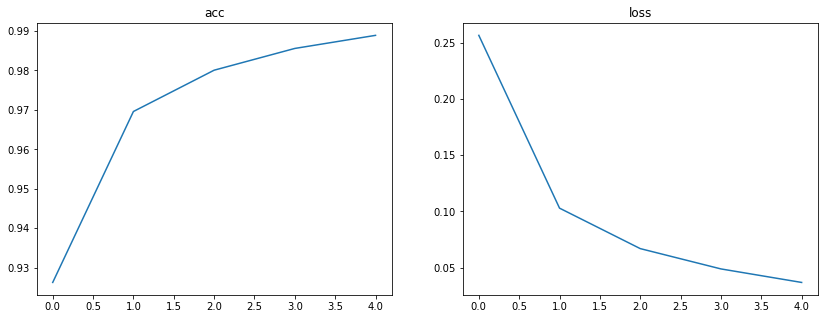

In [26]:
_ , ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history1.history['acc'])
ax[0].set_title('acc')
ax[1].plot(history1.history['loss'])
ax[1].set_title('loss')

In [27]:
eva = network.evaluate(test_data,test_label)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.0691 - acc: 0.9792


In [34]:
print("Accurecy on train data := %.2f %%"%(history1.history['acc'][-1] * 100))
print("Accurecy on test data := %.2f %%"%(eva[1] * 100))

Accurecy on train data := 98.89 %
Accurecy on test data := 97.92 %


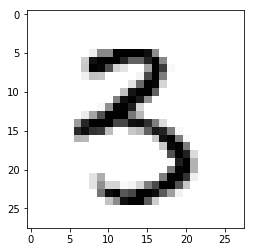

In [37]:
plt.imshow(test_data[5000],cmap="binary")

In [40]:
pred = network.predict(test_data[5000:5001])

In [54]:
def pred(i):
    _ , ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].imshow(test_data[i],cmap="binary")
    pred = network.predict(test_data[i:i+1])
    ax[1].bar(list(range(0,10)),pred[0])
    ax[1].set_xticks(list(range(0,10)))

In [60]:
import random

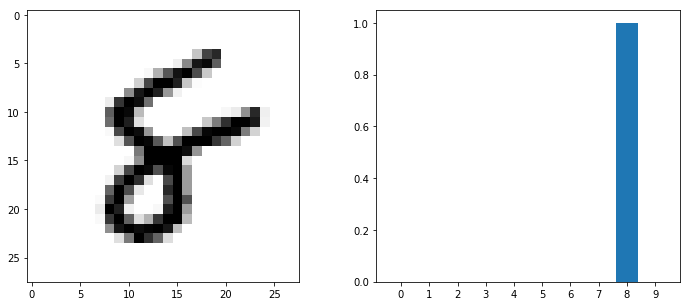

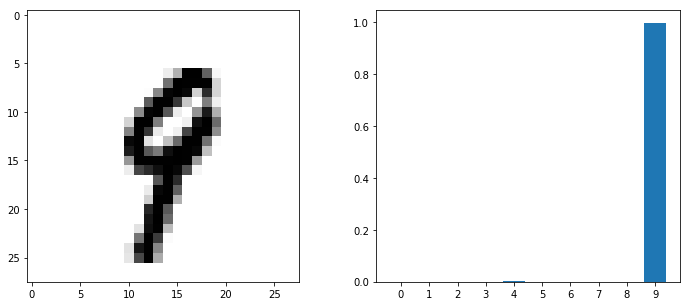

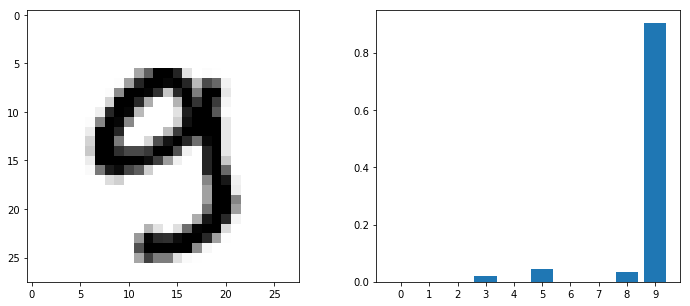

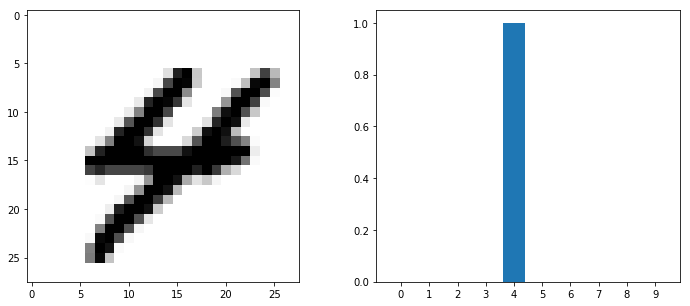

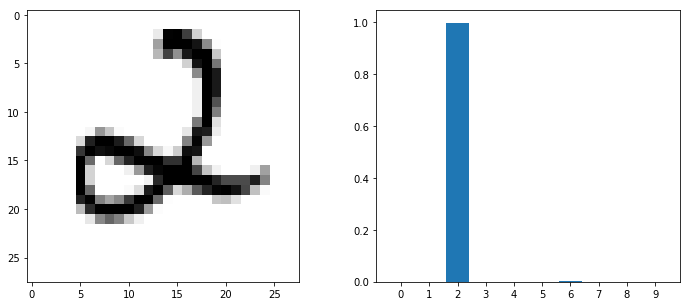

In [69]:
for i in range(5):
    pred(random.randint(0,9999))